- 간단한 데이터를 만들어서 RNN의 구조를 익혀보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터셋 구축하기
- 문자 하나하나를 단위로 RNN을 사용해보자
- hello, apple, lobby, daddy, bobby

In [3]:
# 문제 데이터는 hell, appl, lobb, daddy, bobby
# 정답 데이터는 o, e, y, y, y
# timesteps : 4

In [4]:
# 원핫 인코딩으로 문자를 숫자로 변경
# 문제, 정답 데이터에서 등장하는 문자는 h,e,l,o,a,p,b,x,d
X_train = np.array([[[1,0,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0,0], [0,0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0,0]],   # h,e,l,l
                    [[0,0,0,0,1,0,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,1,0,0,0,0,0,0]],   # a,p,p,l
                    [[0,0,1,0,0,0,0,0,0], [0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0,0]],   # l,o,b,b
                    [[0,0,0,0,0,0,0,0,1], [0,0,0,0,1,0,0,0,0], [0,0,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0,1]],   # d,a,d,d
                    [[0,0,0,0,0,0,1,0,0], [0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0,0]],   # b,o,b,b
                    ])

In [5]:
# 정답 데이터
y_train = np.array([[0,0,0,1,0,0,0,0,0],   # o
                    [0,1,0,0,0,0,0,0,0],   # e
                    [0,0,0,0,0,0,0,1,0],   # y
                    [0,0,0,0,0,0,0,1,0],   # y
                    [0,0,0,0,0,0,0,1,0]    # y
                    ])

In [6]:
X_train.shape, y_train.shape
# samples(샘플수), timesteps(순환횟수), features(특성수 = 원핫인코딩된 컬럼)

((5, 4, 9), (5, 9))

In [7]:
# 출력되는 값을 알파벳 전체로 하고 싶다면 26개로 원핫 인코딩하면됨
# - 현재는 RNN의 구조를 알아보기 위해 간단히 9개 문제로만 문제의 정답을 설정한상태

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [9]:
model = Sequential()

# 입력층 + SimpleRNN층 1개
# 8개의 뉴런을 가지고 각 뉴런이 4번씩 순환하며 각 순화마다 9개의 숫자가 들어감
model.add(SimpleRNN(8, input_shape=(4, 9)))

# 출력층
model.add(Dense(9, activation='softmax'))

model.summary()
# RNN은 가중치가 두 종류 존재(과거데이터, 현재데이터)
# 현재 데이터 -> 입력특성 * RNN층 뉴런수 + RNN층 뉴런수(b값)
# 과거 데이터 -> RNN층 뉴런수 * RNN층 뉴런수
# RNN층의 각 뉴런들이 뽑아낸 결과는 다시 같은 층의 모든 뉴런들에게 과거 데이터로 들어가게 됨

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 144       
                                                                 
 dense (Dense)               (None, 9)                 81        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 과거 : 8 * 8 = 64
# 현재 : 9 * 8 + 8 = 80
# param : 144

In [11]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='Adam',
    metrics=['acc']
)

In [12]:
h = model.fit(X_train,y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.9891 - acc: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 1.9756 - acc: 0.4000
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 1.9622 - acc: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 1.9487 - acc: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 1.9352 - acc: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 1.9218 - acc: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 1.9083 - acc: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 1.8949 - acc: 0.4000
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 1.8815 - acc: 0.4000
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 1.8681 - acc: 0.4000
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss

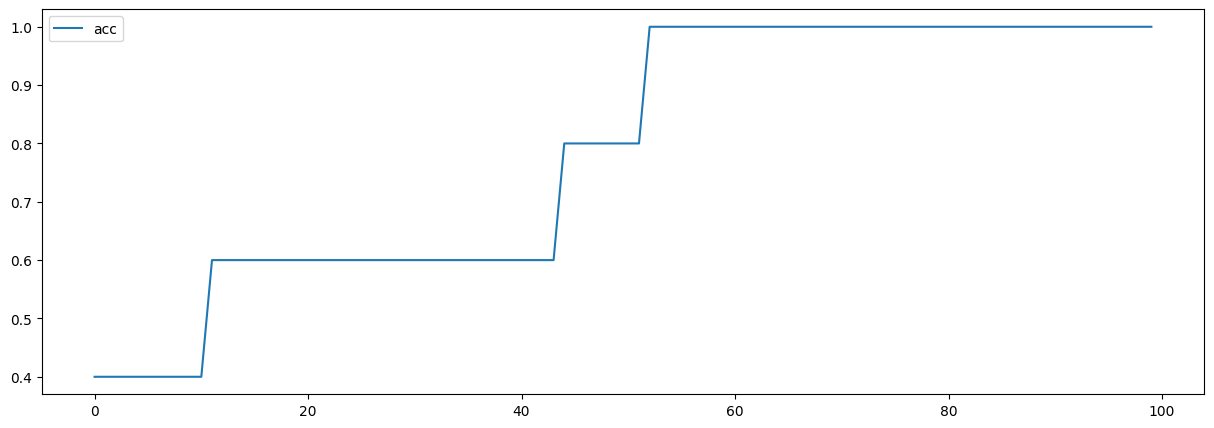

In [13]:
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'], label='acc')
plt.legend()
plt.show()

In [15]:
# apple 데이터 테스트
input_word = np.array([[[0,0,0,0,1,0,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,1,0,0,0,0,0,0]]])
input_word.shape

(1, 4, 9)

In [16]:
# h,e,f,o,a,p,b,y,d 순서대로 확률값이 출력
model.predict(input_word)

1/1 [==============================] - 1s 505ms/step


array([[0.04408973, 0.35887676, 0.0358807 , 0.17290902, 0.08123488,
        0.106644  , 0.02019048, 0.09404027, 0.08613419]], dtype=float32)